#### Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Code

In [28]:
chess_df = pd.read_excel("bases/Chess.xlsx", sheet_name="Chess")
tomato_df = pd.read_csv("bases/Tomato.csv", sep=",")

In [29]:
print("Chess\n")
print("Shape: ",chess_df.shape)
chess_df.info()
chess_df.describe()

Chess

Shape:  (20058, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,6.321335e+16,6.313080e+16,60.465999,1596.631868,1588.831987,4.816981
std,7.292307e+16,7.290633e+16,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.498313e+12,1.498315e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.504366e+12,1.504367e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.486680e+17,1.486680e+17,79.000000,1793.000000,1784.000000,6.000000
max,1.504470e+17,1.504470e+17,349.000000,2700.000000,2723.000000,28.000000


In [30]:
print("Tomato\n")
print("Shape: ",tomato_df.shape)
tomato_df.info()
tomato_df.describe()

Tomato

Shape:  (2741, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


Testing some dataframe functions

In [31]:
set(chess_df["victory_status"])

{'draw', 'mate', 'outoftime', 'resign'}

In [32]:
def categorizar_tomate(average):
    
    if average >= 40 and average <= 70:
        return "tomate medio"
    elif average < 40:
        return "tomate pequeno"
    else:
        return "tomate grande"

In [33]:
tomato_df["Category_tomato"] = tomato_df["Average"].apply(categorizar_tomate)
tomato_df

,Date,Unit,Minimum,Maximum,Average,Market,Category_tomato
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


In [34]:
tomato_df.groupby(["Category_tomato"]).describe()

Minimum                                                      \
                  count       mean       std   min   25%   50%   75%    max   
Category_tomato                                                               
tomate grande     149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate medio      954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno   1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                Maximum             ...              Average             \
                  count       mean  ...   75%    max   count       mean   
Category_tomato                     ...                                   
tomate grande     149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate medio      954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno   1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                          
                      std   min   25%   50%   75%    max  
Category_tomato                                           
tomate grande    7.367396  70.5  75.0  77.5  82.5  117.5  
tomate medio     8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno   7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [35]:
filtro = tomato_df["Average"] < 40
tomato_df.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,Category_tomato
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


### Learning about Numpy library

np.array()

In [36]:
arr_list = np.array([1,2,3,4,5,6,7,8,9])

In [37]:
print(arr_list)

[1 2 3 4 5 6 7 8 9]


np.zeros()

In [38]:
arr_zeros = np.zeros((4,6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


np.ones()

In [39]:
arr_ones = np.ones((3,4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


np.random.rand()

In [40]:
arr_random = np.random.rand(3,4)
print(arr_random)

[[0.98678057 0.10437365 0.4381399  0.91135639]
 [0.58274099 0.77699596 0.83153587 0.54710038]
 [0.95139865 0.91728031 0.49583126 0.31070727]]


### Manipulating data with numpy

reshape

In [41]:
arr_random_reshape = arr_random.reshape((4,3))
print(arr_random_reshape)

[[0.98678057 0.10437365 0.4381399 ]
 [0.91135639 0.58274099 0.77699596]
 [0.83153587 0.54710038 0.95139865]
 [0.91728031 0.49583126 0.31070727]]


concatenate

In [42]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr3 = np.array([[9,10],[11,12]])

In [43]:
arr4 = np.concatenate((arr1,arr2,arr3), axis=1) # axis -> dita o eixo da matriz pelo qual concatenar, 0 para linha e 1 para coluna
print(arr4)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


split

In [44]:
arr4_split = np.split(arr4, 2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


transpose

In [45]:
arr4_transpose = np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


### Doing mathematics with numpy

add

In [46]:
arr_a = np.array([1,7,27])
arr_b = np.array([1,5,1])

In [47]:
arr_a_b = np.add(arr_a,arr_b)
print(arr_a_b)

[ 2 12 28]


subtract

In [48]:
arr_sub_a_b = np.subtract(arr_a,arr_b)
print(arr_sub_a_b)

[ 0  2 26]


## Learning about Matplotlib library

In [50]:
tomato_df.head()

,Date,Unit,Minimum,Maximum,Average,Market,Category_tomato
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [51]:
tomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2741 non-null   object 
 1   Unit             2741 non-null   object 
 2   Minimum          2741 non-null   int64  
 3   Maximum          2741 non-null   int64  
 4   Average          2741 non-null   float64
 5   Market           2741 non-null   object 
 6   Category_tomato  2741 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.0+ KB


In [52]:
tomato_df["Date"] = pd.to_datetime(tomato_df["Date"])

In [54]:
tomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2741 non-null   datetime64[ns]
 1   Unit             2741 non-null   object        
 2   Minimum          2741 non-null   int64         
 3   Maximum          2741 non-null   int64         
 4   Average          2741 non-null   float64       
 5   Market           2741 non-null   object        
 6   Category_tomato  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


### Line chart

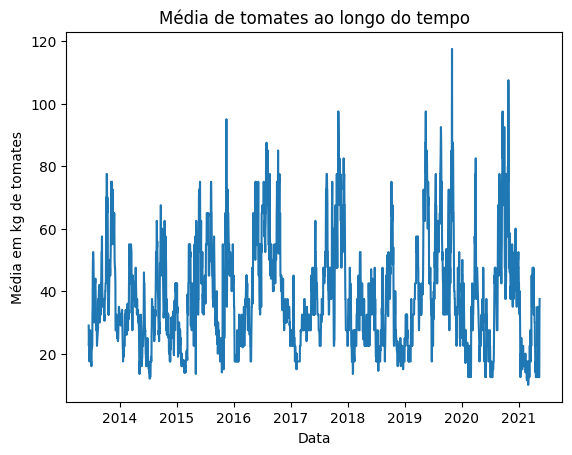

In [57]:
plt.plot(tomato_df["Date"], tomato_df["Average"]) # (x,y)
plt.xlabel("Data")
plt.ylabel("Média em kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()

### Scatter plot

In [58]:
chess_df.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


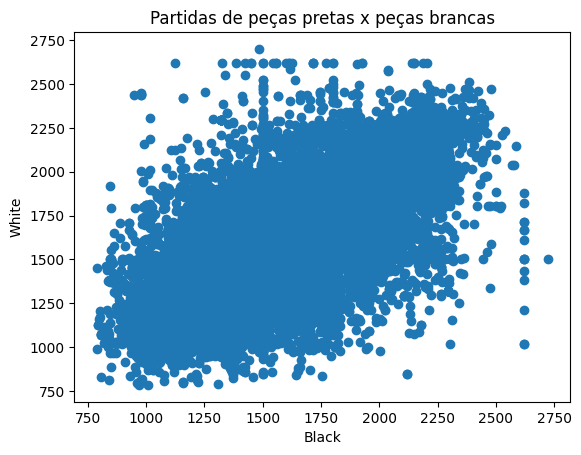

In [59]:
plt.scatter(chess_df["black_rating"], chess_df["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas de peças pretas x peças brancas")
plt.show()

### Bar chart

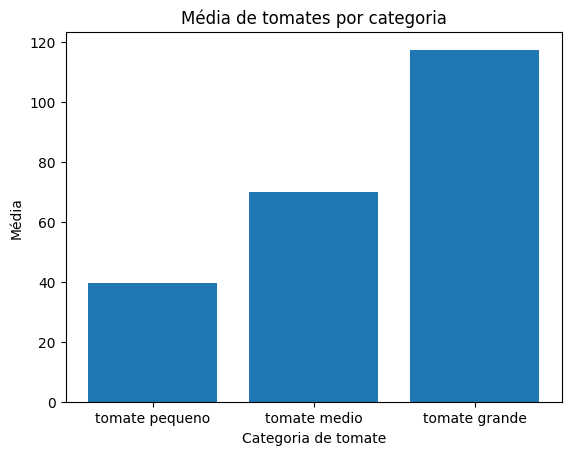

In [61]:
plt.bar(tomato_df["Category_tomato"], tomato_df["Average"])
plt.xlabel("Categoria de tomate")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

### Pie chart

In [66]:
set(chess_df['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

In [72]:
chess_df.groupby(["victory_status"]).count()

,rated,created_at,last_move_at,turns,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
victory_status,,,,,,,,,,,,,
draw,906,906,906,906,906,906,906,906,906,906,906,906,906
mate,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325
outoftime,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680
resign,11147,11147,11147,11147,11147,11147,11147,11147,11147,11147,11147,11147,11147


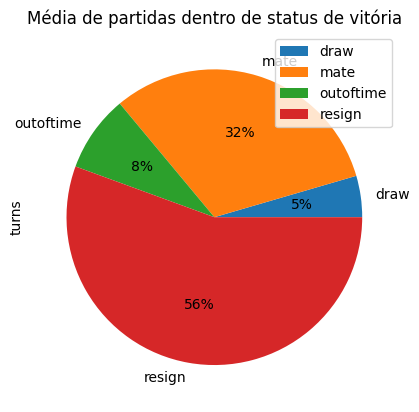

In [71]:
chess_df.groupby(["victory_status"]).count().plot(kind="pie",y='turns', autopct="%1.0f%%")
plt.title("Média de partidas dentro de status de vitória")
plt.show()